In [1]:
import json
import glob
import re

import pandas as pd
import numpy as np

In [2]:
userrepos_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "created_at": [],
    "pushed_at": [],
    "updated_at": [],
    "fork": [],
    "language": [],
    "size": [],
    "description": [],
    "homepage": [],
    "license": [],
    "forks_count": [],
    "open_issues_count": [],
    "stargazers_count": [],
    "watchers_count": [],
}
for filename in glob.glob("/mnt/forks-of-cmssw/user-repos/*.json"):
    for repo in json.load(open(filename)):
        userrepos_lists["repo_id"].append(repo["id"])
        userrepos_lists["owner_login"].append(repo["owner"]["login"])
        userrepos_lists["owner_id"].append(repo["owner"]["id"])
        userrepos_lists["repo_name"].append(repo["name"])
        userrepos_lists["created_at"].append(pd.to_datetime(repo["created_at"]))
        userrepos_lists["pushed_at"].append(pd.to_datetime(repo["pushed_at"]))
        userrepos_lists["updated_at"].append(pd.to_datetime(repo["updated_at"]))
        userrepos_lists["fork"].append(repo["fork"])
        userrepos_lists["language"].append(repo["language"])
        userrepos_lists["size"].append(repo["size"])
        userrepos_lists["description"].append(repo["description"])
        userrepos_lists["homepage"].append(repo["homepage"])
        userrepos_lists["license"].append(None if repo["license"] is None else repo["license"]["name"])
        userrepos_lists["forks_count"].append(repo["forks_count"])
        userrepos_lists["open_issues_count"].append(repo["open_issues_count"])
        userrepos_lists["stargazers_count"].append(repo["stargazers_count"])
        userrepos_lists["watchers_count"].append(repo["watchers_count"])

In [3]:
userrepos = pd.DataFrame(userrepos_lists)
userrepos

,repo_id,owner_login,owner_id,repo_name,created_at,pushed_at,updated_at,fork,language,size,description,homepage,license,forks_count,open_issues_count,stargazers_count,watchers_count
0,23456609,audrium,4990025,cmssw,2014-08-29 07:45:12+00:00,2015-05-06 09:11:37+00:00,2014-08-27 20:48:45+00:00,True,None,739072,CMS Offline Software,cms-sw.github.io/cmssw,None,0,0,0,0
1,26166435,audrium,4990025,CondDB-WS,2014-11-04 11:41:58+00:00,2015-02-05 14:01:47+00:00,2015-02-05 14:01:49+00:00,False,Python,3320,RESTful web service for Hcal condition database,None,None,0,0,0,0
2,110131661,audrium,4990025,cvss3,2017-11-09 15:23:12+00:00,2017-12-19 12:05:17+00:00,2018-10-20 06:22:44+00:00,False,JavaScript,1471,Common Vulnerability Scoring System Version 3....,https://audrium.github.io/cvss3,None,0,0,2,2
3,171297810,audrium,4990025,game-of-life,2019-02-18 14:22:06+00:00,2019-02-18 16:04:50+00:00,2019-02-22 18:13:08+00:00,False,JavaScript,13004,Cellular automaton invented by John Conway,None,None,0,0,4,4
4,12296715,audrium,4990025,JSqlParser,2013-08-22 12:46:35+00:00,2013-08-22 13:48:00+00:00,2013-08-22 20:24:56+00:00,True,Java,1694,JSqlParser parses an SQL statement and transla...,https://github.com/JSQLParser/JSqlParser/wiki,None,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120301,253739954,5l1v3r1,34143537,Cheaterpress,2020-04-07 08:58:14+00:00,2012-12-26 23:15:52+00:00,2020-04-07 08:58:17+00:00,True,None,2536,A Letterpress cheater app,None,None,0,0,0,0
120302,161165276,ebossiniCern,38529812,cmssw,2018-12-10 11:36:13+00:00,2020-07-01 13:31:01+00:00,2018-12-10 11:38:33+00:00,True,C++,1211184,CMS Offline Software,http://cms-sw.github.io/,None,0,0,0,0
120303,23463917,akalamar,7590983,cmssw,2014-08-29 12:54:15+00:00,2014-08-29 12:25:26+00:00,2014-08-27 20:48:45+00:00,True,None,540746,CMS Offline Software,cms-sw.github.io/cmssw,None,0,0,0,0
120304,23389967,akalamar,7590983,SUSY-JGB,2014-08-27 13:07:45+00:00,2014-08-27 13:07:47+00:00,2014-08-27 13:07:45+00:00,False,None,0,"Jet Gamma Balance method, coding",None,MIT License,0,0,0,0


In [4]:
users_with_cmssw = userrepos[(userrepos["repo_name"] == "cmssw") & (userrepos["fork"])]["owner_login"]

In [5]:
userrepos_cut = userrepos[userrepos["owner_login"].isin(users_with_cmssw)]
userrepos_cut = userrepos_cut[~userrepos_cut["fork"]]

In [6]:
userrepos_cut

,repo_id,owner_login,owner_id,repo_name,created_at,pushed_at,updated_at,fork,language,size,description,homepage,license,forks_count,open_issues_count,stargazers_count,watchers_count
1,26166435,audrium,4990025,CondDB-WS,2014-11-04 11:41:58+00:00,2015-02-05 14:01:47+00:00,2015-02-05 14:01:49+00:00,False,Python,3320,RESTful web service for Hcal condition database,None,None,0,0,0,0
2,110131661,audrium,4990025,cvss3,2017-11-09 15:23:12+00:00,2017-12-19 12:05:17+00:00,2018-10-20 06:22:44+00:00,False,JavaScript,1471,Common Vulnerability Scoring System Version 3....,https://audrium.github.io/cvss3,None,0,0,2,2
3,171297810,audrium,4990025,game-of-life,2019-02-18 14:22:06+00:00,2019-02-18 16:04:50+00:00,2019-02-22 18:13:08+00:00,False,JavaScript,13004,Cellular automaton invented by John Conway,None,None,0,0,4,4
6,173121211,audrium,4990025,mlviz,2019-02-28 13:54:30+00:00,2020-06-06 13:38:59+00:00,2019-05-06 15:49:34+00:00,False,JavaScript,3751,Visualization tool for machine learning algori...,,None,0,3,0,0
7,175840178,audrium,4990025,notebooks,2019-03-15 14:55:36+00:00,2019-03-22 08:46:00+00:00,2019-03-22 08:46:01+00:00,False,Jupyter Notebook,162,Various mini experiments in Jupyter notebooks,None,None,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120101,31397775,tempbottle,1203820,jsonrpcpp_websocketpp,2015-02-27 01:29:14+00:00,2014-11-13 04:29:47+00:00,2020-05-26 15:46:08+00:00,False,C++,380,jsonrpc with websocket,None,Other,0,0,1,1
120144,49472450,tempbottle,1203820,kari,2016-01-12 03:31:16+00:00,2015-09-25 16:42:08+00:00,2018-06-05 01:38:40+00:00,False,Rust,196,A embeddable scripting language for Rust,None,MIT License,0,0,0,0
120150,53193360,tempbottle,1203820,KBServer,2016-03-05 09:18:22+00:00,2016-01-08 14:02:43+00:00,2016-05-20 02:09:53+00:00,False,None,35509,C++ game framework,None,None,0,0,0,0
120200,209922579,FusionKernel,55612336,learngit,2019-09-21 04:07:28+00:00,2019-09-21 07:01:57+00:00,2019-09-21 07:01:59+00:00,False,Fortran,1,None,None,None,0,0,0,0


In [7]:
userrepos_cut["Python"] = userrepos_cut["language"] == "Python"
userrepos_cut["Jupyter"] = userrepos_cut["language"] == "Jupyter Notebook"
userrepos_cut["C and C++"] = (userrepos_cut["language"] == "C") | (userrepos_cut["language"] == "C++")

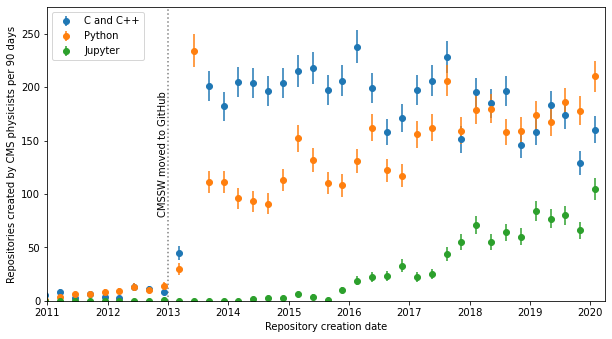

In [8]:
physicists = userrepos_cut.copy()
physicists.index = physicists["created_at"]
bylanguage = physicists[["C and C++", "Python", "Jupyter"]].resample("90D", origin=userrepos_cut["created_at"].max()).sum()
ax = bylanguage.plot(yerr=np.sqrt(bylanguage), marker="o", ls="none", rot=0, figsize=(10, 6))
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 0.5*275, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 0.97*275, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 0.97*275, "End of Run 2", rotation=90, va="top")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Repositories created by CMS physicists per 90 days")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 275)
ax.legend(loc="upper left")
ax.get_figure().savefig("PLOTS/github-cmssw-language.svg")

In [9]:
# (
#     (userrepos_cut["updated_at"] - userrepos_cut["created_at"]).dt.total_seconds() / (24*60*60)
# ).plot.hist(bins=100, range=(10, 3*365))

In [10]:
# words = userrepos_cut.description.str.lower().str.replace(re.compile(r"[^a-z0-9\s_\.-]"), "").str.split(r"[\s_\.-]+")

In [11]:
# personal = [
#     "my",
#     "personal",
# ]

# educational = [
#     "thesis",
#     "phd",
#     "masters",
#     "dissertation",
#     "presentation",
#     "presentations",
#     "proceedings",
#     "tutorial",
#     "tutorials",
#     "university",
#     "universities",
#     "classroom",
#     "workshop",
# ]

# analysis = [
#     "analyze",
#     "analysis",
#     "analyses",
#     "analyzer",
#     "analyzing",
#     "study",
#     "studies",
#     "script",
#     "scripts",
#     "plot",
#     "plots",
#     "plotting",
#     "plotter",
#     "plotters",
#     "histogram",
#     "histograms",
#     "macros",
#     "tool",
#     "tools",
#     "framework",
#     "frameworks",
#     "toolkit",
#     "toolkits",
# ]

# machine_learning = [
#     "ml",
#     "machine",
#     "learn",
#     "learning",
#     "neural",
#     "training",
#     "regression",
#     "regressions",
#     "bdt",
#     "mva",
# ]

# computer_words = [
#     "python",
#     "c",
#     "javascript",
#     "latex",
#     "php",
#     "jupyter",
#     "spark",
#     "aws",
#     "keras",
#     "tensorflow",
#     "gpu",
#     "matlab",
#     "torch",
#     "pytorch",
#     "julia",
#     "vim",
#     "boost",
#     "clang",
#     "ipython",
#     "openstack",
#     "bash",
#     "matplotlib",
#     "docker",
#     "dockerfile",
#     "sql",
#     "json",
#     "xml",
#     "rust",
#     "scala",
#     "cmake",
#     "ruby",
#     "kubernetes",
#     "webgl",
#     "beamer",
# ]

# physics_brands = [
#     "cms",
#     "cmssw",
#     "root",
#     "xrootd",
#     "cern",
#     "geant",
#     "geant4",
#     "atlas",
#     "tmva",
#     "htcondor",
#     "grid",
#     "delphes",
#     "pythia",
#     "pythia6",
#     "pythia8",
#     "houches",
#     "edm",
#     "svfit",
#     "fastjet",
#     "roofit",
#     "crab3",
#     "lxplus",
# ]

# physics_likely = [
#     "trigger",
#     "triggers",
#     "detector",
#     "detectors",
#     "reconstruction",
#     "simulate",
#     "simulates",
#     "simulating",
#     "simulator",
#     "simulators",
#     "simulation",
#     "simulations",
#     "validation",
#     "validations",
#     "calibration",
#     "calibrations",
#     "alignment",
#     "alignments",
#     "energy",
#     "energies",
#     "particle",
#     "particles",
#     "event",
#     "events",
#     "beam",
#     "mass",
#     "tagging",
#     "tagger",
#     "taggers",
#     "tracking",
#     "fit",
#     "fits",
#     "fitter",
#     "fitters",
#     "signal",
#     "signals",
#     "background",
#     "backgrounds",
#     "cluster",
#     "clusters",
#     "gem",
#     "run2",
#     "quantum",
#     "cosmic",
#     "charge",
#     "charged",
#     "clustering",
#     "tuple",
#     "tuples",
#     "luminosity",
#     "collision",
#     "collisions",
#     "colliding",
#     "momentum",
#     "momenta",
#     "top",
#     "tops",
# ]

# physics_definite = [
#     "ntuple",
#     "ntuples",
#     "ntuplizer",
#     "ntuplizers",
#     "kinematic",
#     "qcd",
#     "mc",
#     "monte",
#     "carlo",
#     "carlos",
#     "tev",
#     "susy",
#     "daq",
#     "dqm",
#     "hcal",
#     "hgcal",
#     "ecal",
#     "tracker",
#     "rpc",
#     "hlt",
#     "lhe",
#     "jet",
#     "jets",
#     "quark",
#     "quarks",
#     "higgs",
#     "tau",
#     "taus",
#     "muon",
#     "muons",
#     "photon",
#     "photons",
#     "electron",
#     "electrons",
#     "proton",
#     "protons",
#     "lepton",
#     "leptons",
#     "leptonic",
#     "hadron",
#     "hadrons",
#     "hadronic",
#     "meson",
#     "mesons",
#     "mu",
#     "gamma",
#     "decay",
#     "decays",
#     "boson",
#     "fermion",
#     "ttbar",
#     "boosted",
# ]

In [12]:
# userrepos_cut["personal"] = words.apply(lambda d: False if d is None else any(word in personal for word in d))
# userrepos_cut["educational"] = words.apply(lambda d: False if d is None else any(word in educational for word in d))
# userrepos_cut["analysis"] = words.apply(lambda d: False if d is None else any(word in analysis for word in d))
# userrepos_cut["machine_learning"] = words.apply(lambda d: False if d is None else any(word in machine_learning for word in d))
# userrepos_cut["computer_words"] = words.apply(lambda d: False if d is None else any(word in computer_words for word in d))
# userrepos_cut["physics_brands"] = words.apply(lambda d: False if d is None else any(word in physics_brands for word in d))
# userrepos_cut["physics_likely"] = words.apply(lambda d: False if d is None else any(word in physics_likely for word in d))
# userrepos_cut["physics_definite"] = words.apply(lambda d: False if d is None else any(word in physics_definite for word in d))

In [13]:
# userrepos_cut["long_lived"] = (userrepos_cut["updated_at"] - userrepos_cut["created_at"]).dt.total_seconds() > (7*24*60*60)

In [14]:
# all_words = words.explode()

In [15]:
# ax = all_words[
#     all_words.isin(educational) | all_words.isin(analysis) | all_words.isin(machine_learning) |
#     all_words.isin(physics_brands) | all_words.isin(physics_likely) | all_words.isin(physics_definite)
# ].value_counts(ascending=True).iloc[-25:].plot.barh(width=1.0, figsize=(10, 6))
# ax.set_xlabel("Number of repositories with a given word in its description")

In [16]:
# physicists = userrepos_cut[(
#     userrepos_cut["educational"] | userrepos_cut["analysis"] |  userrepos_cut["machine_learning"] |
#     userrepos_cut["physics_brands"] | userrepos_cut["physics_likely"] | userrepos_cut["physics_definite"]
# ) & userrepos_cut["long_lived"]]
# physicists.index = physicists["created_at"]
# bylanguage = physicists[["C and C++", "Python", "Jupyter"]].resample("90D", origin=userrepos_cut["created_at"].max()).sum()
# ax = bylanguage.plot(yerr=np.sqrt(bylanguage), marker="o", ls="none", rot=0, figsize=(10, 6))
# ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
# ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 97, "CMSSW moved to GitHub", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 97, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 97, "End of Run 2", rotation=90, va="top")
# years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
# ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
# ax.set_xticklabels(years, ha="center")
# ax.set_xlabel("Repository creation date")
# ax.set_ylabel("Repositories created by CMS physicists per 90 days")
# ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
# ax.set_ylim(0, 100)
# ax.legend(loc="upper left");

In [17]:
userrepos_cut2 = userrepos[
    userrepos["owner_login"].isin(users_with_cmssw) &
    ~userrepos["fork"]
].copy()
userrepos_cut2["C and C++"] = (userrepos_cut2["language"] == "C") | (userrepos_cut2["language"] == "C++")
userrepos_cut2["Python"] = userrepos_cut2["language"] == "Python"
userrepos_cut2["Jupyter"] = userrepos_cut2["language"] == "Jupyter Notebook"
userrepos_cut2 = userrepos_cut2.groupby([
    pd.Grouper(key="owner_login"),
    pd.Grouper(key="created_at", freq="90D", origin=userrepos_cut["created_at"].max()),
])[["C and C++", "Python", "Jupyter"]].sum()
sum1 = userrepos_cut2.groupby(level=1).count()
sumx = userrepos_cut2.groupby(level=1).sum()
sumxx = (userrepos_cut2**2).groupby(level=1).sum()
y = (sumx / sum1)
yerr = np.sqrt((sumxx / sum1) - (sumx / sum1)**2) / np.sqrt(sum1)

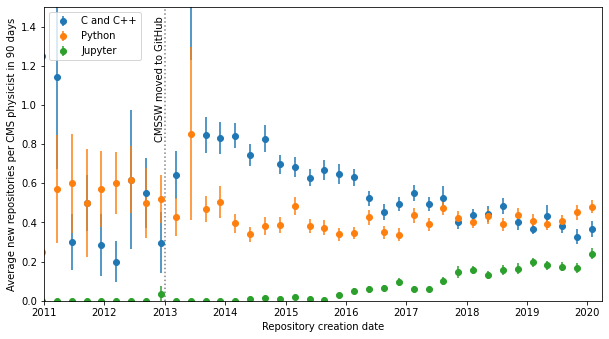

In [18]:
ax = y.plot(yerr=yerr, marker="o", ls="none", rot=0, figsize=(10, 6))
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 1.5*0.97, "CMSSW moved to GitHub", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 1.5*0.97, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 1.5*0.97, "End of Run 2", rotation=90, va="top")
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("Average new repositories per CMS physicist in 90 days")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 1.5)
ax.legend(loc="upper left")
ax.get_figure().savefig("PLOTS/github-cmssw-language-byuser.svg")

In [19]:
search_uproot_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/uproot/*.json"):
    for match in json.load(open(filename))["items"]:
        search_uproot_lists["repo_id"].append(match["repository"]["id"])
        search_uproot_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_uproot_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_uproot_lists["repo_name"].append(match["repository"]["name"])
        search_uproot_lists["path"].append(match["path"])
        search_uproot_lists["fork"].append(match["repository"]["fork"])

search_uproot = pd.DataFrame(search_uproot_lists)
search_uproot.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_uproot_vstime = pd.merge(search_uproot, userrepos.set_index(["owner_login", "repo_name"]))
search_uproot_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_uproot_vstime = search_uproot_vstime.groupby(level=2).max()["repo_id"] != 0
search_uproot_vstime = search_uproot_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [20]:
search_iminuit_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/iminuit/*.json"):
    for match in json.load(open(filename))["items"]:
        search_iminuit_lists["repo_id"].append(match["repository"]["id"])
        search_iminuit_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_iminuit_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_iminuit_lists["repo_name"].append(match["repository"]["name"])
        search_iminuit_lists["path"].append(match["path"])
        search_iminuit_lists["fork"].append(match["repository"]["fork"])

search_iminuit = pd.DataFrame(search_iminuit_lists)
search_iminuit.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_iminuit_vstime = pd.merge(search_iminuit, userrepos.set_index(["owner_login", "repo_name"]))
search_iminuit_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_iminuit_vstime = search_iminuit_vstime.groupby(level=2).max()["repo_id"] != 0
search_iminuit_vstime = search_iminuit_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [21]:
search_rootnumpy_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/root-numpy/*.json"):
    for match in json.load(open(filename))["items"]:
        search_rootnumpy_lists["repo_id"].append(match["repository"]["id"])
        search_rootnumpy_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_rootnumpy_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_rootnumpy_lists["repo_name"].append(match["repository"]["name"])
        search_rootnumpy_lists["path"].append(match["path"])
        search_rootnumpy_lists["fork"].append(match["repository"]["fork"])

search_rootnumpy = pd.DataFrame(search_rootnumpy_lists)
search_rootnumpy.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_rootnumpy_vstime = pd.merge(search_rootnumpy, userrepos.set_index(["owner_login", "repo_name"]))
search_rootnumpy_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_rootnumpy_vstime = search_rootnumpy_vstime.groupby(level=2).max()["repo_id"] != 0
search_rootnumpy_vstime = search_rootnumpy_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [22]:
search_pythonroot_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/python-root/*.json"):
    for match in json.load(open(filename))["items"]:
        search_pythonroot_lists["repo_id"].append(match["repository"]["id"])
        search_pythonroot_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_pythonroot_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_pythonroot_lists["repo_name"].append(match["repository"]["name"])
        search_pythonroot_lists["path"].append(match["path"])
        search_pythonroot_lists["fork"].append(match["repository"]["fork"])

search_pythonroot = pd.DataFrame(search_pythonroot_lists)
search_pythonroot.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_pythonroot_vstime = pd.merge(search_pythonroot, userrepos.set_index(["owner_login", "repo_name"]))
search_pythonroot_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_pythonroot_vstime = search_pythonroot_vstime.groupby(level=2).max()["repo_id"] != 0
search_pythonroot_vstime = search_pythonroot_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [23]:
search_cpproot_lists = {
    "repo_id": [],
    "owner_login": [],
    "owner_id": [],
    "repo_name": [],
    "path": [],
    "fork": [],
}

for filename in glob.glob("/mnt/forks-of-cmssw/packages/cpp-root/*.json"):
    for match in json.load(open(filename))["items"]:
        search_cpproot_lists["repo_id"].append(match["repository"]["id"])
        search_cpproot_lists["owner_login"].append(match["repository"]["owner"]["login"])
        search_cpproot_lists["owner_id"].append(match["repository"]["owner"]["id"])
        search_cpproot_lists["repo_name"].append(match["repository"]["name"])
        search_cpproot_lists["path"].append(match["path"])
        search_cpproot_lists["fork"].append(match["repository"]["fork"])

search_cpproot = pd.DataFrame(search_cpproot_lists)
search_cpproot.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

search_cpproot_vstime = pd.merge(search_cpproot, userrepos.set_index(["owner_login", "repo_name"]))
search_cpproot_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_cpproot_vstime = search_cpproot_vstime.groupby(level=2).max()["repo_id"] != 0
search_cpproot_vstime = search_cpproot_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [24]:
search_cpproot

repo_id          owner_login  owner_id  \
owner_login         repo_name                                                
camendola           macro          46921317            camendola  15126038   
                    macro          46921317            camendola  15126038   
                    macro          46921317            camendola  15126038   
                    macro          46921317            camendola  15126038   
                    macro          46921317            camendola  15126038   
...                                     ...                  ...       ...   
ShevchenkoRostyslav MssmHbbBackUp  48440137  ShevchenkoRostyslav   8866683   
                    MssmHbbBackUp  48440137  ShevchenkoRostyslav   8866683   
                    MssmHbbBackUp  48440137  ShevchenkoRostyslav   8866683   
                    MssmHbbBackUp  48440137  ShevchenkoRostyslav   8866683   
                    MssmHbbBackUp  48440137  ShevchenkoRostyslav   8866683   

                                       repo_name  \
owner_login         repo_name                      
camendola           macro                  macro   
                    macro                  macro   
                    macro                  macro   
                    macro                  macro   
                    macro                  macro   
...                                          ...   
ShevchenkoRostyslav MssmHbbBackUp  MssmHbbBackUp   
                    MssmHbbBackUp  MssmHbbBackUp   
                    MssmHbbBackUp  MssmHbbBackUp   
                    MssmHbbBackUp  MssmHbbBackUp   
                    MssmHbbBackUp  MssmHbbBackUp   

                                                                          path  \
owner_login         repo_name                                                    
camendola           macro                                         pt2_on_mgg.C   
                    macro                                    pt2_on_mgg_norm.C   
                    macro                                               ptgg.C   
                    macro                                          ptgg_norm.C   
                    macro                                          sigma_opt.C   
...                                                                        ...   
ShevchenkoRostyslav MssmHbbBackUp  Analysis/MssmHbb/bin/doubleBTagSelection.cc   
                    MssmHbbBackUp  Analysis/Tools/bin/ExampleToolsForNtuple.cc   
                    MssmHbbBackUp          Analysis/Tools/interface/Analysis.h   
                    MssmHbbBackUp        Analysis/Ntuplizer/bin/NtupleCheck.cc   
                    MssmHbbBackUp      Analysis/Ntuplizer/plugins/Ntuplizer.cc   

                                    fork  
owner_login         repo_name             
camendola           macro          False  
                    macro          False  
                    macro          False  
                    macro          False  
                    macro          False  
...                                  ...  
ShevchenkoRostyslav MssmHbbBackUp  False  
                    MssmHbbBackUp  False  
                    MssmHbbBackUp  False  
                    MssmHbbBackUp  False  
                    MssmHbbBackUp  False  

[56210 rows x 6 columns]

In [25]:
search_anyroot = pd.merge(
    search_cpproot.set_index("repo_id"),
    search_pythonroot.set_index("repo_id"),
    left_on=["owner_login", "repo_name"],
    right_on=["owner_login", "repo_name"],
    how="outer",
)
search_anyroot.set_index(["owner_login", "repo_name"], inplace=True, drop=False)
search_anyroot_vstime = pd.merge(search_anyroot, userrepos.set_index(["owner_login", "repo_name"]), left_index=True, right_index=True)
search_anyroot_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
search_anyroot_vstime = search_anyroot_vstime.groupby(level=2).max()["repo_id"] != 0
search_anyroot_vstime = search_anyroot_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

In [26]:
search_packages = {}
for package in ["matplotlib", "cpp-tmva", "python-tmva", "cpp-torch", "python-torch", "cpp-tensorflow", "python-tensorflow",
                "sklearn", "tensorflow", "pandas", "numpy"]:
    search_lists = {
        "repo_id": [],
        "owner_login": [],
        "owner_id": [],
        "repo_name": [],
        "path": [],
        "fork": [],
    }

    for filename in glob.glob("/mnt/forks-of-cmssw/packages/" + package + "/*.json"):
        for match in json.load(open(filename))["items"]:
            search_lists["repo_id"].append(match["repository"]["id"])
            search_lists["owner_login"].append(match["repository"]["owner"]["login"])
            search_lists["owner_id"].append(match["repository"]["owner"]["id"])
            search_lists["repo_name"].append(match["repository"]["name"])
            search_lists["path"].append(match["path"])
            search_lists["fork"].append(match["repository"]["fork"])

    search = pd.DataFrame(search_lists)
    search.set_index(["owner_login", "repo_name"], inplace=True, drop=False)

    search_vstime = pd.merge(search, userrepos.set_index(["owner_login", "repo_name"]))
    search_vstime.set_index(["owner_login", "repo_name", "created_at"], inplace=True)
    search_vstime = search_vstime.groupby(level=2).max()["repo_id"] != 0
    search_vstime = search_vstime.resample("90D", origin=userrepos_cut["created_at"].max()).sum()

    search_packages[package] = search_vstime

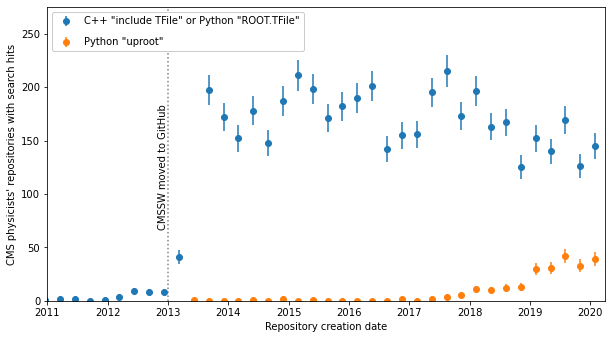

In [47]:
ax = search_anyroot_vstime.plot(yerr=np.sqrt(search_anyroot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_uproot_vstime.plot(yerr=np.sqrt(search_uproot_vstime), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 275)
ax.legend([
    "C++ \"include TFile\" or Python \"ROOT.TFile\"", "Python \"uproot\""
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 250*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-anyroot-uproot.svg")

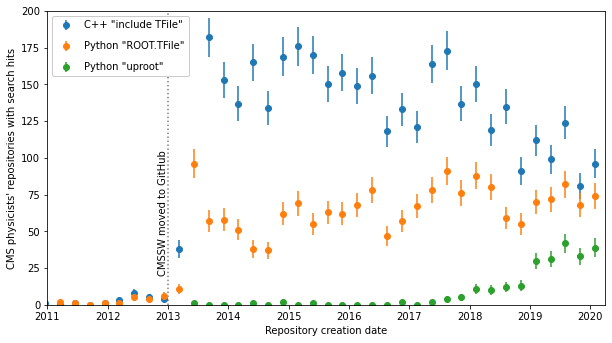

In [48]:
ax = search_cpproot_vstime.plot(yerr=np.sqrt(search_cpproot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_pythonroot_vstime.plot(yerr=np.sqrt(search_pythonroot_vstime), marker="o", ls="none", rot=0, ax=ax)
search_uproot_vstime.plot(yerr=np.sqrt(search_uproot_vstime), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 200)
ax.legend([
    "C++ \"include TFile\"", "Python \"ROOT.TFile\"", "Python \"uproot\""
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 125*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-root-uproot.svg")

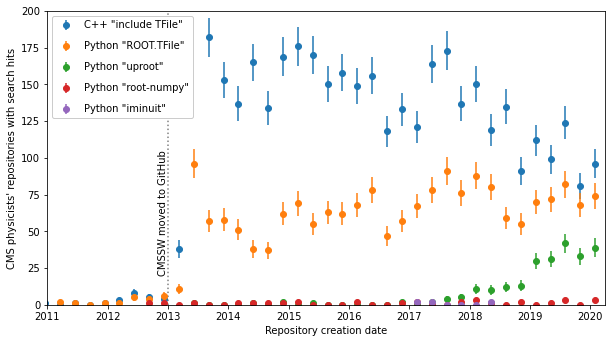

In [49]:
ax = search_cpproot_vstime.plot(yerr=np.sqrt(search_cpproot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_pythonroot_vstime.plot(yerr=np.sqrt(search_pythonroot_vstime), marker="o", ls="none", rot=0, ax=ax)
search_uproot_vstime.plot(yerr=np.sqrt(search_uproot_vstime), marker="o", ls="none", rot=0, ax=ax)
search_iminuit_vstime.plot(yerr=np.sqrt(search_iminuit_vstime), marker="o", ls="none", rot=0, ax=ax)
search_rootnumpy_vstime.plot(yerr=np.sqrt(search_rootnumpy_vstime), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 200)
ax.legend([
    "C++ \"include TFile\"", "Python \"ROOT.TFile\"", "Python \"uproot\"", "Python \"root-numpy\"", "Python \"iminuit\""
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 125*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-root-python.svg")

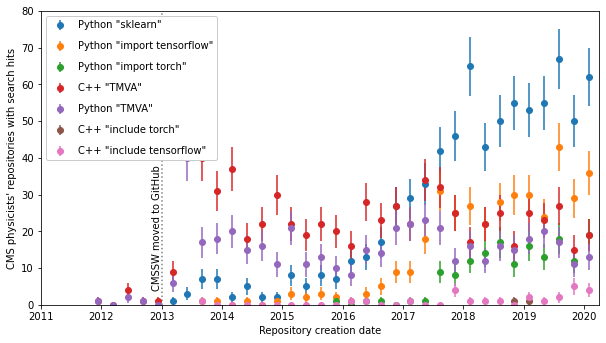

In [50]:
ax = search_packages["sklearn"].plot(yerr=np.sqrt(search_packages["sklearn"]), marker="o", ls="none", rot=0, figsize=(10, 6))
search_packages["python-tensorflow"].plot(yerr=np.sqrt(search_packages["python-tensorflow"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["python-torch"].plot(yerr=np.sqrt(search_packages["python-torch"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["cpp-tmva"].plot(yerr=np.sqrt(search_packages["cpp-tmva"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["python-tmva"].plot(yerr=np.sqrt(search_packages["python-tmva"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["cpp-torch"].plot(yerr=np.sqrt(search_packages["cpp-torch"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["cpp-tensorflow"].plot(yerr=np.sqrt(search_packages["cpp-tensorflow"]), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 80)
ax.legend([
    "Python \"sklearn\"",
    "Python \"import tensorflow\"",
    "Python \"import torch\"",
    "C++ \"TMVA\"",
    "Python \"TMVA\"",
    "C++ \"include torch\"",
    "C++ \"include tensorflow\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 42*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-machine-learning.svg")

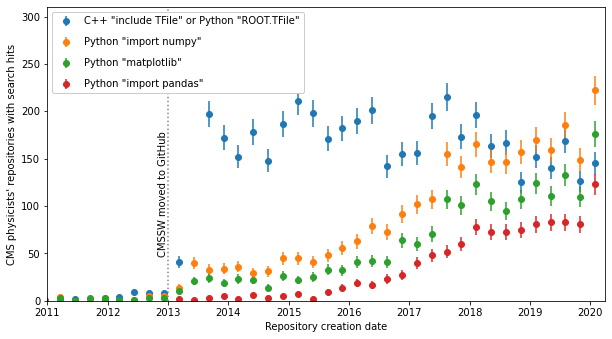

In [60]:
ax = search_anyroot_vstime.plot(yerr=np.sqrt(search_anyroot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_packages["numpy"].plot(yerr=np.sqrt(search_packages["numpy"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["matplotlib"].plot(yerr=np.sqrt(search_packages["matplotlib"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["pandas"].plot(yerr=np.sqrt(search_packages["pandas"]), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 310)
ax.legend([
    "C++ \"include TFile\" or Python \"ROOT.TFile\"", "Python \"import numpy\"", "Python \"matplotlib\"", "Python \"import pandas\""
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 225*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-anyroot-python.svg")

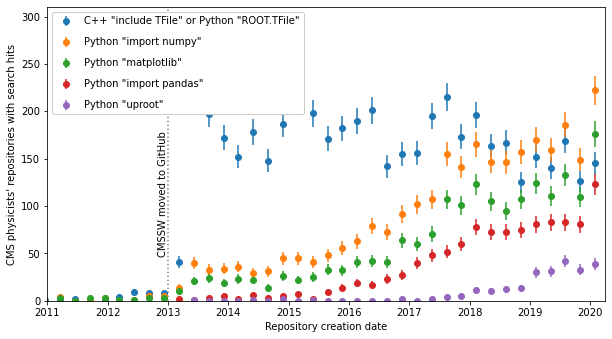

In [66]:
ax = search_anyroot_vstime.plot(yerr=np.sqrt(search_anyroot_vstime), marker="o", ls="none", rot=0, figsize=(10, 6))
search_packages["numpy"].plot(yerr=np.sqrt(search_packages["numpy"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["matplotlib"].plot(yerr=np.sqrt(search_packages["matplotlib"]), marker="o", ls="none", rot=0, ax=ax)
search_packages["pandas"].plot(yerr=np.sqrt(search_packages["pandas"]), marker="o", ls="none", rot=0, ax=ax)
search_uproot_vstime.plot(yerr=np.sqrt(search_uproot_vstime), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 310)
ax.legend([
    "C++ \"include TFile\" or Python \"ROOT.TFile\"", "Python \"import numpy\"", "Python \"matplotlib\"", "Python \"import pandas\"", "Python \"uproot\""
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 225*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-anyroot-python-uproot.svg")

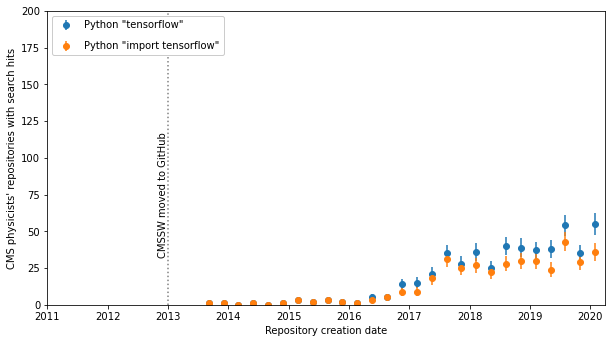

In [52]:
ax = search_packages["tensorflow"].plot(yerr=np.sqrt(search_packages["tensorflow"]), marker="o", ls="none", rot=0, figsize=(10, 6))
search_packages["python-tensorflow"].plot(yerr=np.sqrt(search_packages["python-tensorflow"]), marker="o", ls="none", rot=0, ax=ax)
years = ("2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020")
ax.set_xticks([pd.to_datetime(x + "-01-01") for x in years])
ax.set_xticklabels(years, ha="center")
ax.set_xlabel("Repository creation date")
ax.set_ylabel("CMS physicists' repositories with search hits")
ax.set_xlim(pd.to_datetime("2011-01-01"), pd.to_datetime("2020-04-01"))
ax.set_ylim(0, 200)
ax.legend([
    "Python \"tensorflow\"", "Python \"import tensorflow\"",
], loc="upper left", labelspacing=1.1, framealpha=1)
ax.axvline(pd.to_datetime("2013-01-01"), c="gray", ls=":")
ax.text(pd.to_datetime("2013-01-01") - pd.to_timedelta("60 days"), 150*0.5, "CMSSW moved to GitHub", rotation=90, va="center")
# ax.axvline(pd.to_datetime("2015-04-10"), c="gray", ls=":")
# ax.text(pd.to_datetime("2015-04-10")- pd.to_timedelta("60 days"), 175, "Start of Run 2", rotation=90, va="top")
# ax.axvline(pd.to_datetime("2018-12-03"), c="gray", ls=":")
# ax.text(pd.to_datetime("2018-12-03")- pd.to_timedelta("60 days"), 175, "End of Run 2", rotation=90, va="top")
ax.get_figure().savefig("PLOTS/github-tensorflow-crosscheck.svg")

In [53]:
preworkshop = pd.read_csv("/mnt/preworkshop-survey.csv")
postworkshop = pd.read_csv("/mnt/postworkshop-survey.csv")

In [54]:
c = preworkshop["Professional life: Are you associated with one or more experimental or theoretical collaborations? (E.g. ATLAS, CMS, DUNE, USQCD...)"]
is_cms = (
    (c == "Belle II, CMS") |
    (c == "cms") |
    (c == "Cms") |
    (c == "CMS") |
    (c == "CMS, ALICE") |
    (c == "CMS, DUNE") |
    (c == "CMS Experiment") |
    (c == "CMS, SModelS") |
    (c == "I am in a team that they are in collaboration with CMS and I am going to join in a CERN group.") |
    (c == "I'm associated with CMS experiment") |
    (c == "Just switched from CMS to CTA") |
    (c == "yes, CMS") |
    (c == "Yes: CMS")
)

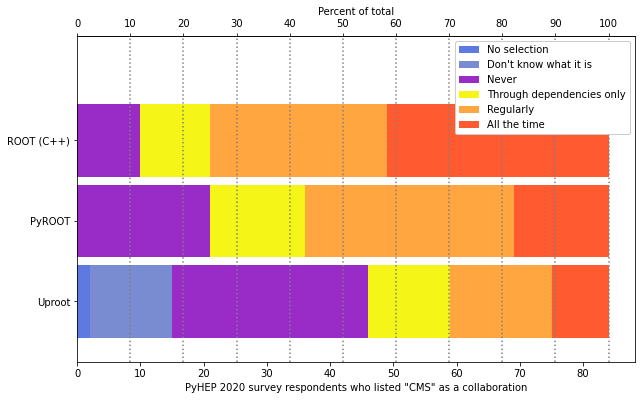

In [55]:
cols = {
    "Particle physics ecosystem: ROOT in C++: https://root.cern": "ROOT (C++)",
    "Particle physics ecosystem: ROOT through PyROOT: https://root.cern": "PyROOT",
    "Particle physics ecosystem: Uproot: https://github.com/scikit-hep/uproot": "Uproot",
}
order = [
    "Particle physics ecosystem: ROOT in C++: https://root.cern",
    "Particle physics ecosystem: ROOT through PyROOT: https://root.cern",
    "Particle physics ecosystem: Uproot: https://github.com/scikit-hep/uproot",
]
pkgs = preworkshop[is_cms][order[::-1]].rename(columns=cols).apply(pd.Series.value_counts).T[[
    "Don't know what it is", "Never", "Through dependencies only", "Regularly", "All the time"
]].fillna(0)
pkgs.insert(0, "No selection", pkgs.sum(axis=1).max() - pkgs.sum(axis=1))
ax = pkgs.plot.barh(stacked=True, width=0.9, figsize=(10, 6), color=["#5e79e0", "#798bd1", "#992cc7", "#f5f518", "#ffa640", "#ff5a30"])
num_respondents = pkgs.sum(axis=1).mean()
ax.axvline(0.1*num_respondents, c="gray", ls=":")
ax.axvline(0.2*num_respondents, c="gray", ls=":")
ax.axvline(0.3*num_respondents, c="gray", ls=":")
ax.axvline(0.4*num_respondents, c="gray", ls=":")
ax.axvline(0.5*num_respondents, c="gray", ls=":")
ax.axvline(0.6*num_respondents, c="gray", ls=":")
ax.axvline(0.7*num_respondents, c="gray", ls=":")
ax.axvline(0.8*num_respondents, c="gray", ls=":")
ax.axvline(0.9*num_respondents, c="gray", ls=":")
ax.axvline(1.0*num_respondents, c="gray", ls=":")
axR = ax.secondary_xaxis("top")
axR.set_xticks([x*num_respondents for x in (0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)])
axR.set_xticklabels(["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"])
axR.set_xlabel("Percent of total")
ax.legend(loc="upper right", framealpha=1)
ax.set_ylim(-0.75, 3.3)
ax.set_xlabel("PyHEP 2020 survey respondents who listed \"CMS\" as a collaboration")
ax.get_figure().savefig("PLOTS/pyhepsurvey-root-uproot.svg")